In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import warnings
import seaborn as sn
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
al=pd.read_excel("Airlines+Data.xlsx")

In [3]:
al.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
al.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [5]:
al.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [6]:
al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [7]:
al.shape

(96, 2)

In [8]:
al.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [9]:
al.isna().sum()

Month         0
Passengers    0
dtype: int64

In [10]:
al.isnull().sum()

Month         0
Passengers    0
dtype: int64

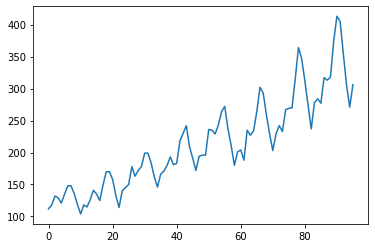

In [11]:
plt.plot(al['Passengers'])

<AxesSubplot:>

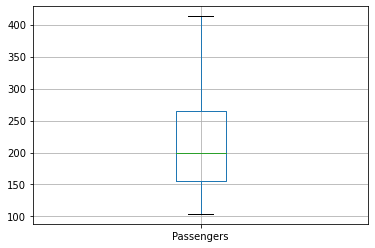

In [12]:
al.boxplot(['Passengers'])

<AxesSubplot:xlabel='Passengers', ylabel='Density'>

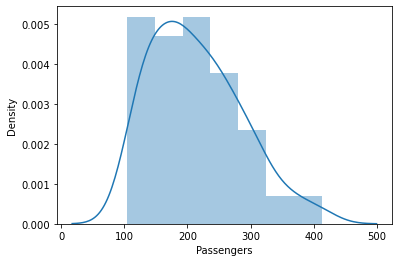

In [13]:
sn.distplot(al['Passengers'])

<AxesSubplot:>

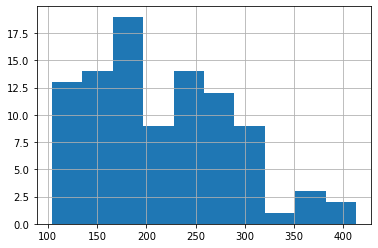

In [14]:
al.Passengers.hist()

In [15]:
al.rename(columns={'Month':'Date'},inplace=True)
al

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [16]:
al['Year'] = al.Date.dt.strftime("%Y")
al['Month'] = al.Date.dt.strftime("%b")
al['date'] = al.Date.dt.strftime("%d")
al

,Date,Passengers,Year,Month,date
0,1995-01-01,112,1995,Jan,01
1,1995-02-01,118,1995,Feb,01
2,1995-03-01,132,1995,Mar,01
3,1995-04-01,129,1995,Apr,01
4,1995-05-01,121,1995,May,01
...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01
92,2002-09-01,355,2002,Sep,01
93,2002-10-01,306,2002,Oct,01
94,2002-11-01,271,2002,Nov,01


In [17]:
al_table=pd.pivot_table(data=al,index='Year',columns='Month',values='Passengers',aggfunc='mean',fill_value=0)
al_table

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<AxesSubplot:xlabel='Month', ylabel='Year'>

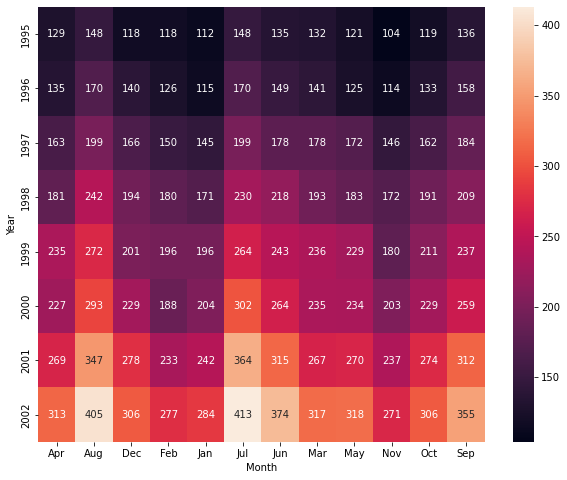

In [18]:
plt.figure(figsize=(10,8))
sn.heatmap(data=al_table,annot=True,fmt='g')

<function matplotlib.pyplot.show(close=None, block=None)>

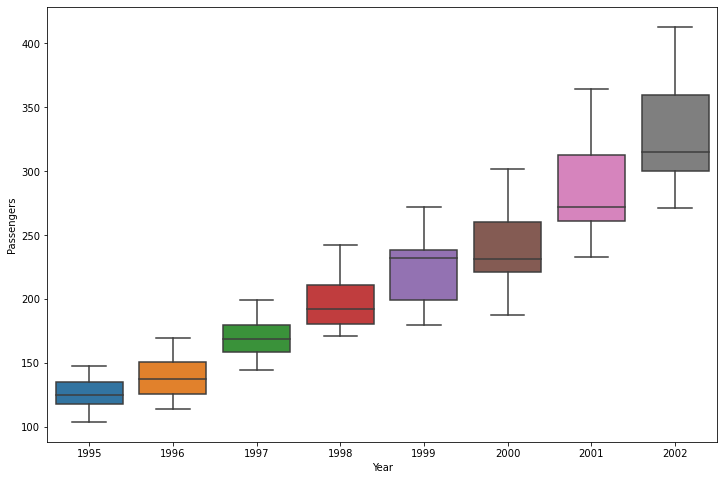

In [19]:
plt.figure(figsize=(12,8))
sn.boxplot(x='Year',y='Passengers',data=al)
plt.show

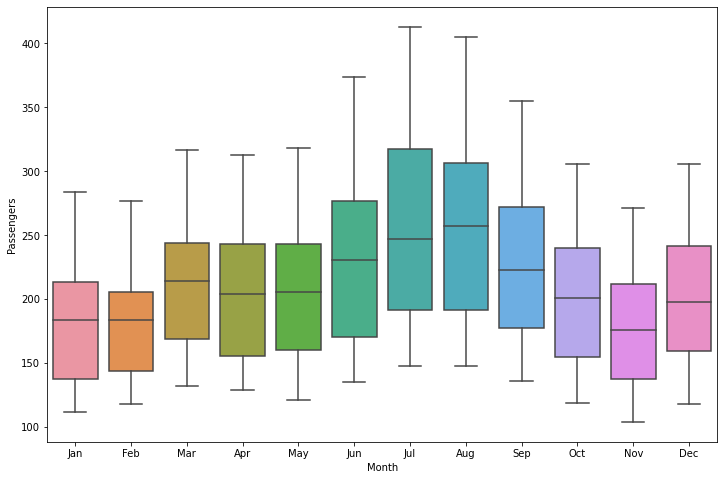

In [20]:
plt.figure(figsize=(12,8))
sn.boxplot(data=al,x='Month',y='Passengers')
plt.show()

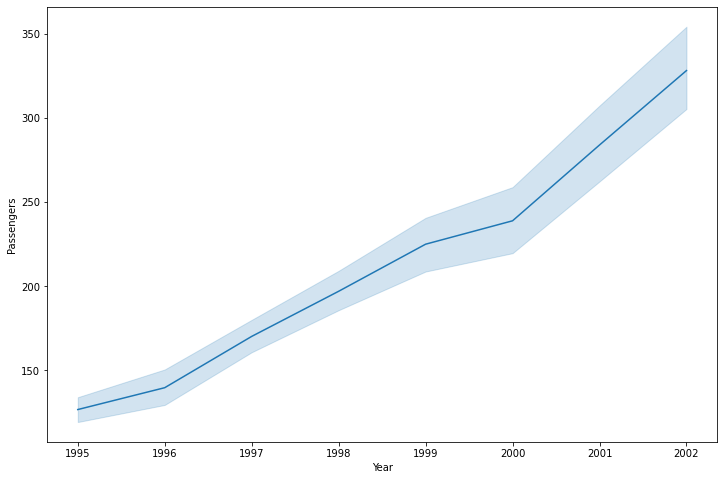

In [21]:
plt.figure(figsize=(12,8))
sn.lineplot(data=al,x='Year',y='Passengers')
plt.show()

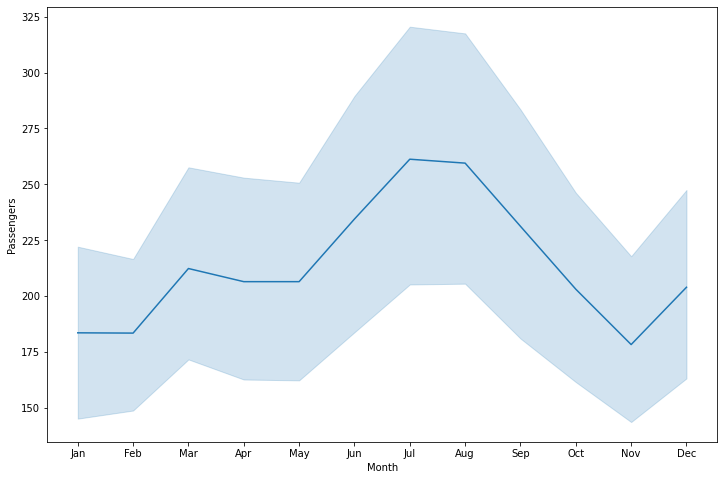

In [22]:
plt.figure(figsize=(12,8))
sn.lineplot(data=al,x='Month',y='Passengers')
plt.show()

In [23]:
al['t']=np.arange(0,96)
al['t_sqr']=al['t']*al['t']
al['log_passenger']=np.log(al['Passengers'])
al

,Date,Passengers,Year,Month,date,t,t_sqr,log_passenger
0,1995-01-01,112,1995,Jan,01,0,0,4.718499
1,1995-02-01,118,1995,Feb,01,1,1,4.770685
2,1995-03-01,132,1995,Mar,01,2,4,4.882802
3,1995-04-01,129,1995,Apr,01,3,9,4.859812
4,1995-05-01,121,1995,May,01,4,16,4.795791
...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01,91,8281,6.003887
92,2002-09-01,355,2002,Sep,01,92,8464,5.872118
93,2002-10-01,306,2002,Oct,01,93,8649,5.723585
94,2002-11-01,271,2002,Nov,01,94,8836,5.602119


In [24]:
month_dummies=pd.get_dummies(al['Month'])
month_dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
al_new=pd.concat([al,month_dummies],axis=1)
al_new

,Date,Passengers,Year,Month,date,t,t_sqr,log_passenger,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995,Jan,01,0,0,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,Feb,01,1,1,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,Mar,01,2,4,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,Apr,01,3,9,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,May,01,4,16,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01,91,8281,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002,Sep,01,92,8464,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002,Oct,01,93,8649,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002,Nov,01,94,8836,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


## Splitting the Dataset

In [26]:
train=al_new.head(80)
test=al_new.tail(16)

In [27]:
test

,Date,Passengers,Year,Month,date,t,t_sqr,log_passenger,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
80,2001-09-01,312,2001,Sep,01,80,6400,5.743003,0,0,0,0,0,0,0,0,0,0,0,1
81,2001-10-01,274,2001,Oct,01,81,6561,5.613128,0,0,0,0,0,0,0,0,0,0,1,0
82,2001-11-01,237,2001,Nov,01,82,6724,5.468060,0,0,0,0,0,0,0,0,0,1,0,0
83,2001-12-01,278,2001,Dec,01,83,6889,5.627621,0,0,1,0,0,0,0,0,0,0,0,0
84,2002-01-01,284,2002,Jan,01,84,7056,5.648974,0,0,0,0,1,0,0,0,0,0,0,0
85,2002-02-01,277,2002,Feb,01,85,7225,5.624018,0,0,0,1,0,0,0,0,0,0,0,0
86,2002-03-01,317,2002,Mar,01,86,7396,5.758902,0,0,0,0,0,0,0,1,0,0,0,0
87,2002-04-01,313,2002,Apr,01,87,7569,5.746203,1,0,0,0,0,0,0,0,0,0,0,0
88,2002-05-01,318,2002,May,01,88,7744,5.762051,0,0,0,0,0,0,0,0,1,0,0,0
89,2002-06-01,374,2002,Jun,01,89,7921,5.924256,0,0,0,0,0,0,1,0,0,0,0,0


In [28]:
train

,Date,Passengers,Year,Month,date,t,t_sqr,log_passenger,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995,Jan,01,0,0,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,Feb,01,1,1,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,Mar,01,2,4,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,Apr,01,3,9,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,May,01,4,16,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2001-04-01,269,2001,Apr,01,75,5625,5.594711,1,0,0,0,0,0,0,0,0,0,0,0
76,2001-05-01,270,2001,May,01,76,5776,5.598422,0,0,0,0,0,0,0,0,1,0,0,0
77,2001-06-01,315,2001,Jun,01,77,5929,5.752573,0,0,0,0,0,0,1,0,0,0,0,0
78,2001-07-01,364,2001,Jul,01,78,6084,5.897154,0,0,0,0,0,1,0,0,0,0,0,0


### Linear Model

In [29]:
linear_model=smf.ols('Passengers~t',data=train).fit()
pred_lmodel=pd.Series(linear_model.predict(test['t']))
rmse_lmodel=np.sqrt(mean_squared_error(test['Passengers'],pred_lmodel))
rmse_lmodel

47.54262406772677

## Exponential Model

In [30]:
expo_model=smf.ols('log_passenger~t',data=train).fit()
pred_expomodel=pd.Series(expo_model.predict(test['t']))
rmse_expomodel=np.sqrt(mean_squared_error(test['Passengers'],np.exp(pred_expomodel)))
rmse_expomodel

43.79373939334316

## Quadratic Model

In [31]:
Quad_model=smf.ols('Passengers~t+t_sqr',data=train).fit()
pred_qmodel=pd.Series(Quad_model.predict(test[['t','t_sqr']]))
rmse_qmodel=np.sqrt(mean_squared_error(test['Passengers'],pred_qmodel))
rmse_qmodel

43.65440369584195

## Addictive Seasonality Model

In [88]:
asm_model=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_asmmodel=pd.Series(asm_model.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_asmmodel=np.sqrt(mean_squared_error(test['Passengers'],pred_asmmodel))
rmse_asmmodel

129.26647641443313

## Addictive Seasonality Quadratic Model

In [86]:
asqm_model=smf.ols('Passengers~t+t_sqr+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_asqm_model=pd.Series(asqm_model.predict(test))
rmse_asqmmodel=np.sqrt(mean_squared_error(test['Passengers'],pred_asqm_model))
rmse_asqmmodel

23.910983570080994

## Multiplicative Addictive Seasonality Model

In [85]:
masm_model=smf.ols('log_passenger~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_masm_model=pd.Series(masm_model.predict(test))
rmse_masmmodel=np.sqrt(mean_squared_error(test['Passengers'],np.exp(pred_mam_model)))
rmse_masmmodel

9.469000230466023

## Multiplicative Seasonality Model

In [84]:
msm_model=smf.ols('log_passenger~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_msm_model=pd.Series(msm_model.predict(test))
rmse_msmmodel=np.sqrt(mean_squared_error(test['Passengers'],np.exp(pred_msm_model)))
rmse_msmmodel

135.32648414621084

In [40]:
data={'model':(['linear_model','expo_model','Quad_model','asm_model','asqm_model','msm_model','masm_model']),
       'rsme_values':([rmse_lmodel,rmse_expomodel,rmse_qmodel,rmse_asmmodel,rmse_asqmmodel,rmse_msmmodel,rmse_masmmodel])
     }
data

{'model': ['linear_model',
  'expo_model',
  'Quad_model',
  'asm_model',
  'asqm_model',
  'msm_model',
  'masm_model'],
 'rsme_values': [47.54262406772677,
  43.79373939334316,
  43.65440369584195,
  129.26647641443301,
  23.91098357009541,
  135.32648414621056,
  9.469000230466023]}

In [41]:
rsme_data=pd.DataFrame(data)
rsme_data

,model,rsme_values
0,linear_model,47.542624
1,expo_model,43.793739
2,Quad_model,43.654404
3,asm_model,129.266476
4,asqm_model,23.910984
5,msm_model,135.326484
6,masm_model,9.469000


In [42]:
rsme_data.sort_values('rsme_values')

,model,rsme_values
6,masm_model,9.469000
4,asqm_model,23.910984
2,Quad_model,43.654404
1,expo_model,43.793739
0,linear_model,47.542624
3,asm_model,129.266476
5,msm_model,135.326484


## The RMSE score of Multiplicative Additive Seasonality is very good
### Building the model on entire dataset choosing "Multiplicative Additive Seasonality"(masm) 

## Final Model

In [44]:
al_new.head()

,Date,Passengers,Year,Month,date,t,t_sqr,log_passenger,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995,Jan,01,0,0,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,Feb,01,1,1,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,Mar,01,2,4,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,Apr,01,3,9,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,May,01,4,16,4.795791,0,0,0,0,0,0,0,0,1,0,0,0


In [45]:
t=np.arange(97,108)
t

array([ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107])

In [47]:
t_sqr=t*t
t_sqr

array([ 9409,  9604,  9801, 10000, 10201, 10404, 10609, 10816, 11025,
       11236, 11449])

In [52]:
month=pd.date_range(start='1/1/2003',end='11/1/2003',freq='MS')
month

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01', '2003-11-01'],
              dtype='datetime64[ns]', freq='MS')

In [57]:
month=pd.DataFrame(month,columns=['Date'])
month

,Date
0,2003-01-01
1,2003-02-01
2,2003-03-01
3,2003-04-01
4,2003-05-01
5,2003-06-01
6,2003-07-01
7,2003-08-01
8,2003-09-01
9,2003-10-01


In [61]:
df={'t':t,'t_sqr':t_sqr}
values=pd.DataFrame(df)
values

,t,t_sqr
0,97,9409
1,98,9604
2,99,9801
3,100,10000
4,101,10201
5,102,10404
6,103,10609
7,104,10816
8,105,11025
9,106,11236


In [64]:
data=pd.concat([month,values],axis=1)
data

,Date,t,t_sqr
0,2003-01-01,97,9409
1,2003-02-01,98,9604
2,2003-03-01,99,9801
3,2003-04-01,100,10000
4,2003-05-01,101,10201
5,2003-06-01,102,10404
6,2003-07-01,103,10609
7,2003-08-01,104,10816
8,2003-09-01,105,11025
9,2003-10-01,106,11236


In [70]:
data['Day']=data.Date.dt.strftime('%d')  # we can use data['Date'].dt.strftime('%d') for splitting it 
data['Month']=data.Date.dt.strftime('%b')
data['Year']=data.Date.dt.strftime('%y')
data

,Date,t,t_sqr,Day,Month,Year
0,2003-01-01,97,9409,01,Jan,03
1,2003-02-01,98,9604,01,Feb,03
2,2003-03-01,99,9801,01,Mar,03
3,2003-04-01,100,10000,01,Apr,03
4,2003-05-01,101,10201,01,May,03
5,2003-06-01,102,10404,01,Jun,03
6,2003-07-01,103,10609,01,Jul,03
7,2003-08-01,104,10816,01,Aug,03
8,2003-09-01,105,11025,01,Sep,03
9,2003-10-01,106,11236,01,Oct,03


In [72]:
month_dummy=pd.get_dummies(data['Month'])
month_dummy

,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,1,0


In [74]:
final_data=pd.concat([data,month_dummy],axis=1)
final_data

,Date,t,t_sqr,Day,Month,Year,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2003-01-01,97,9409,01,Jan,03,0,0,0,1,0,0,0,0,0,0,0
1,2003-02-01,98,9604,01,Feb,03,0,0,1,0,0,0,0,0,0,0,0
2,2003-03-01,99,9801,01,Mar,03,0,0,0,0,0,0,1,0,0,0,0
3,2003-04-01,100,10000,01,Apr,03,1,0,0,0,0,0,0,0,0,0,0
4,2003-05-01,101,10201,01,May,03,0,0,0,0,0,0,0,1,0,0,0
5,2003-06-01,102,10404,01,Jun,03,0,0,0,0,0,1,0,0,0,0,0
6,2003-07-01,103,10609,01,Jul,03,0,0,0,0,1,0,0,0,0,0,0
7,2003-08-01,104,10816,01,Aug,03,0,1,0,0,0,0,0,0,0,0,0
8,2003-09-01,105,11025,01,Sep,03,0,0,0,0,0,0,0,0,0,0,1
9,2003-10-01,106,11236,01,Oct,03,0,0,0,0,0,0,0,0,0,1,0


In [75]:
final_data.dtypes

Date     datetime64[ns]
t                 int32
t_sqr             int32
Day              object
Month            object
Year             object
Apr               uint8
Aug               uint8
Feb               uint8
Jan               uint8
Jul               uint8
Jun               uint8
Mar               uint8
May               uint8
Nov               uint8
Oct               uint8
Sep               uint8
dtype: object

## Forecasting

In [90]:
pred_final=masm_model.predict(final_data)
pred_final

0     5.775485
1     5.791078
2     5.935442
3     5.899711
4     5.889992
5     6.008354
6     6.115617
7     6.115993
8     6.006672
9     5.879591
10    5.750080
dtype: float64

In [92]:
x=np.exp(pred_final)
x

0     322.300737
1     327.365856
2     378.207256
3     364.931945
4     361.402437
5     406.813139
6     452.875430
7     453.045477
8     406.129524
9     357.662998
10    314.215689
dtype: float64

In [93]:
pred_final=pd.DataFrame(x,columns=['pred_final'])
pred_final

,pred_final
0,322.300737
1,327.365856
2,378.207256
3,364.931945
4,361.402437
5,406.813139
6,452.875430
7,453.045477
8,406.129524
9,357.662998


In [95]:
pred_data=pd.concat([pred_final,round(final_data)],axis=1)
pred_data

,pred_final,Date,t,t_sqr,Day,Month,Year,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,322.300737,2003-01-01,97,9409,01,Jan,03,0,0,0,1,0,0,0,0,0,0,0
1,327.365856,2003-02-01,98,9604,01,Feb,03,0,0,1,0,0,0,0,0,0,0,0
2,378.207256,2003-03-01,99,9801,01,Mar,03,0,0,0,0,0,0,1,0,0,0,0
3,364.931945,2003-04-01,100,10000,01,Apr,03,1,0,0,0,0,0,0,0,0,0,0
4,361.402437,2003-05-01,101,10201,01,May,03,0,0,0,0,0,0,0,1,0,0,0
5,406.813139,2003-06-01,102,10404,01,Jun,03,0,0,0,0,0,1,0,0,0,0,0
6,452.875430,2003-07-01,103,10609,01,Jul,03,0,0,0,0,1,0,0,0,0,0,0
7,453.045477,2003-08-01,104,10816,01,Aug,03,0,1,0,0,0,0,0,0,0,0,0
8,406.129524,2003-09-01,105,11025,01,Sep,03,0,0,0,0,0,0,0,0,0,0,1
9,357.662998,2003-10-01,106,11236,01,Oct,03,0,0,0,0,0,0,0,0,0,1,0


## There are 11 dummies, RMSE score of mulitiplicative Additive Seasonality = 9.46, is very good